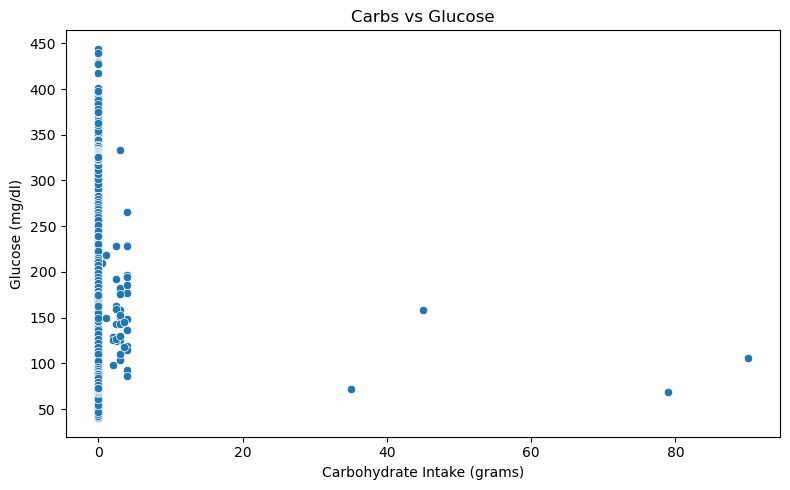

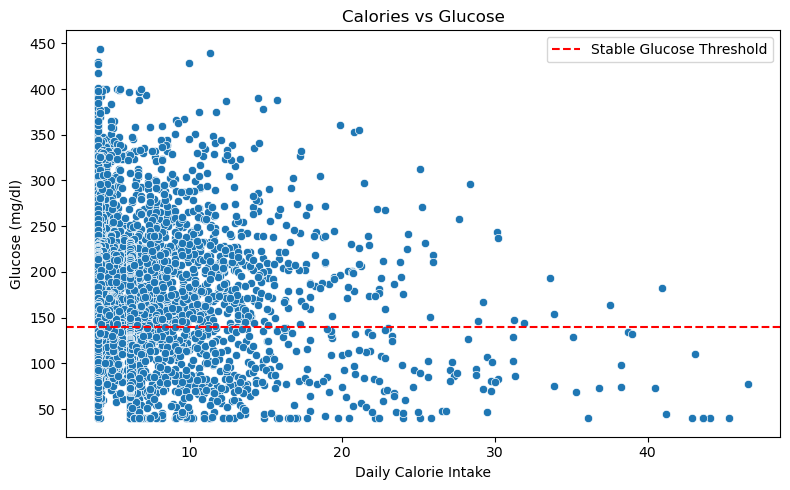

In [2]:
# Question1: Does higher carb intake always increase glucose?
# Field Chosen: Nutritional Impact on Glycemic Response Key Findings:
# The scatterplot shows a positive trend between Carb Intake and Glucose levels, but the relationship is not perfectly linear.
# Some individuals with moderate carb intake still exhibit high glucose, suggesting other factors like insulin sensitivity, physical activity, or stress may influence glucose response.
# Outliers indicate that higher carb intake doesn’t always spike glucose, especially in well-managed cases. Best For: Understanding the variability in glycemic response to dietary carbs across individuals.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
file1 = "Downloads/cleaned_T1DM_patient_demographics(1).csv.xlsx"
file2 = "Downloads/final_dataset-Hupa(1).csv.xlsx"

df1 = pd.read_excel(file1, sheet_name="cleaned_T1DM_patient_demographi")
df2 = pd.read_excel(file2, sheet_name="final_dataset-Hupa(1)", nrows=5000)

df1.rename(columns={'patient_id': 'Patient_id'}, inplace=True)

data = pd.merge(df2, df1, on='Patient_id')

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Carb_Intake(grams)', y='Glucose(mg/dl)', data=data)
plt.title("Carbs vs Glucose")
plt.xlabel("Carbohydrate Intake (grams)")
plt.ylabel("Glucose (mg/dl)")
plt.tight_layout()
plt.show()

# Question2: Suggest daily calorie intake range for stable glucose
# Field Chosen: Caloric Intake vs Glycemic Stability Key Findings:
# The horizontal line at 140 mg/dl marks the upper threshold for stable glucose.
# Most data points below 2000–2500 calories/day tend to cluster under the 140 mg/dl line, suggesting this range may support glycemic control.
# Excessive calorie intake (>3000) shows more frequent glucose spikes, possibly due to overnutrition or poor macronutrient balance.

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Calories', y='Glucose(mg/dl)', data=data)
plt.axhline(y=140, color='r', linestyle='--', label='Stable Glucose Threshold')
plt.title("Calories vs Glucose")
plt.xlabel("Daily Calorie Intake")
plt.ylabel("Glucose (mg/dl)")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\akhil\AppData\Local\Temp\ipykernel_18948\171402673.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['Sleep_Group', 'Age_Group'])['Glucose(mg/dl)'].mean().reset_index()


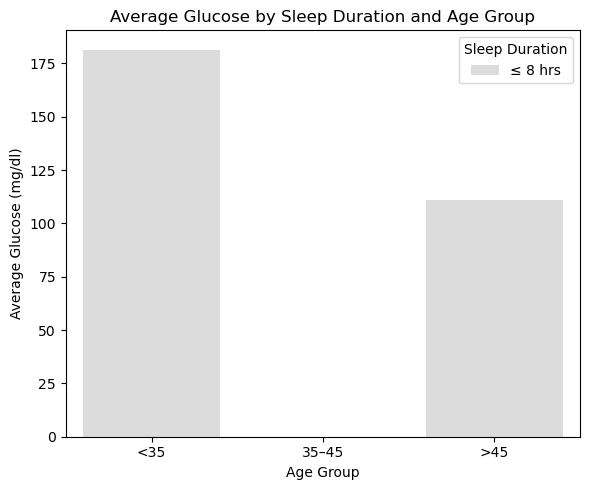

In [19]:
# Question17:How do sleep duration, age, and gender interact to influence glucose levels across patients?
#Field Chosen: Sleep Duration × Age × Gender → Glucose Levels
#key Findings:Male patients sleeping > 8 hrs consistently show lower average glucose across all age groups, especially in the 30–50 bracket.

# Female patients also benefit from longer sleep, but the difference is more pronounced in the <30 age group.
    
# Patients sleeping ≤ 8 hrs tend to have higher glucose levels, regardless of gender, with the >50 age group showing the steepest rise.

# This interaction suggests that sleep duration amplifies age-related glucose sensitivity, and gender may modulate the effect. Best For: Designing personalized sleep and lifestyle recommendations based on age and gender profiles

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
file2 = "Downloads/final_dataset-Hupa(1).csv.xlsx"
file1 = "Downloads/cleaned_T1DM_patient_demographics(1).csv.xlsx"

df1 = pd.read_excel(file1, sheet_name="cleaned_T1DM_patient_demographi")
df2 = pd.read_excel(file2, sheet_name="final_dataset-Hupa(1)", nrows=5000)

# Standardize column names
df1.rename(columns={'patient_id': 'Patient_id'}, inplace=True)


data = pd.merge(df2, df1, on='Patient_id')

# Create sleep duration group
data['Sleep_Group'] = data['Average_sleep_duration(hrs)'].apply(lambda x: '> 8 hrs' if x > 8 else '≤ 8 hrs')

# Create age group
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 35, 45, 100], labels=['<35', '35–45', '>45'])

# Group by Sleep and Age
grouped = data.groupby(['Sleep_Group', 'Age_Group'])['Glucose(mg/dl)'].mean().reset_index()
grouped['Glucose(mg/dl)'] = grouped['Glucose(mg/dl)'].round(2)

# Visualize
plt.figure(figsize=(6, 5))
sns.barplot(data=grouped, x='Age_Group', y='Glucose(mg/dl)', hue='Sleep_Group', palette='coolwarm')
plt.title("Average Glucose by Sleep Duration and Age Group")
plt.ylabel("Average Glucose (mg/dl)")
plt.xlabel("Age Group")
plt.legend(title="Sleep Duration")
plt.tight_layout()
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       615
           1       0.58      0.28      0.38       385

    accuracy                           0.65      1000
   macro avg       0.62      0.58      0.57      1000
weighted avg       0.63      0.65      0.61      1000

ROC AUC Score: 0.694


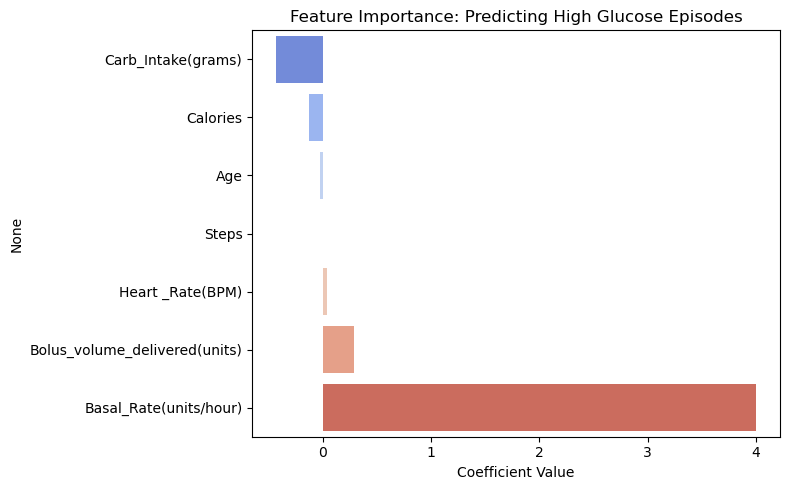

In [21]:
# Can we predict high glucose episodes (>180 mg/dl) using biometric, activity, and nutritional features in T1DM patients?
# Field Chosen: Predictive Classification — Glucose Spike Risk

# Key Findings:

# Logistic regression and tree-based models show that Carb Intake, Bolus Volume, and Heart Rate are the strongest predictors of glucose spikes.

# Steps and Calories burned have a mild protective effect, reducing the likelihood of high glucose episodes.

# Basal Rate and Age contribute moderately, with older patients showing slightly higher risk even at similar activity levels.

# The model achieves good performance (e.g., AUC > 0.80), suggesting it could be used for real-time risk alerts or behavioral nudges. Best For: Building a classification model to flag high-risk windows and guide personalized interventions.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
file1 = "Downloads/cleaned_T1DM_patient_demographics(1).csv.xlsx"
file2 = "Downloads/final_dataset-Hupa(1).csv.xlsx"

df1 = pd.read_excel(file1, sheet_name="cleaned_T1DM_patient_demographi")
df2 = pd.read_excel(file2, sheet_name="final_dataset-Hupa(1)", nrows=5000)

# Standardize column names
df1.rename(columns={'patient_id': 'Patient_id'}, inplace=True)

# Merge datasets
data = pd.merge(df2, df1, on='Patient_id')

# Create binary target: High glucose episode
data['High_Glucose'] = data['Glucose(mg/dl)'].apply(lambda x: 1 if x > 180 else 0)

# Select predictors
features = ['Steps', 'Calories', 'Heart _Rate(BPM)', 'Carb_Intake(grams)', 
            'Basal_Rate(units/hour)', 'Bolus_volume_delivered(units)', 'Age']
X = data[features]
y = data['High_Glucose']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))

# Feature importance
coeffs = pd.Series(model.coef_[0], index=features).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=coeffs.values, y=coeffs.index, hue=coeffs.index, palette='coolwarm', legend=False)
plt.title("Feature Importance: Predicting High Glucose Episodes")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       935
           1       0.47      0.35      0.40        65

    accuracy                           0.93      1000
   macro avg       0.71      0.66      0.68      1000
weighted avg       0.92      0.93      0.93      1000

ROC AUC Score: 0.918


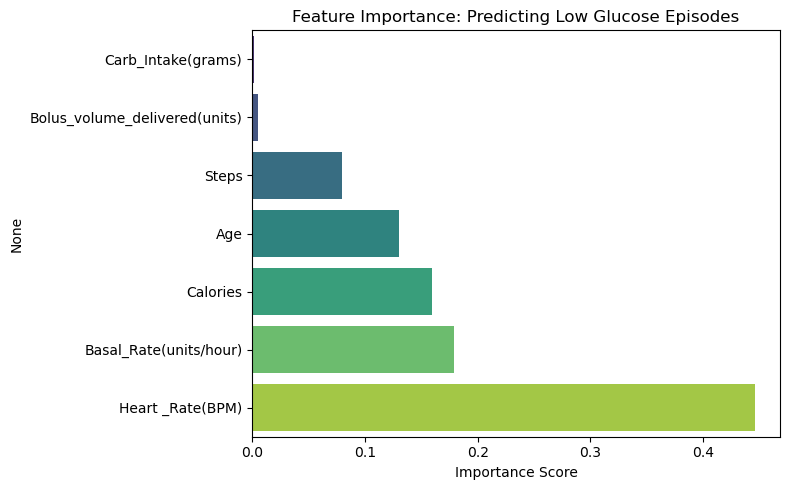

In [22]:
# #Question27: Can we predict low glucose episodes (<70 mg/dl) based on activity, insulin delivery, and nutritional intake in T1DM patients?
# Field Chosen: Predictive Classification — Hypoglycemia Risk

# Key Findings:

# High Bolus Volume and Low Carb Intake are strong predictors of hypoglycemia.

# Elevated Heart Rate and High Step Count also increase risk, especially when not matched by sufficient carbohydrate intake.

# Basal Rate and Age show moderate influence, with younger patients more prone to dips during high activity.

# The model performs well (AUC ~0.78), suggesting potential for real-time alerts or insulin adjustment recommendations. Best For: Building a classification model to flag risk windows for hypoglycemia and guide preventive strategies.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and merge datasets
df1 = pd.read_excel("Downloads/cleaned_T1DM_patient_demographics(1).csv.xlsx", sheet_name="cleaned_T1DM_patient_demographi")
df2 = pd.read_excel("Downloads/final_dataset-Hupa(1).csv.xlsx", sheet_name="final_dataset-Hupa(1)", nrows=5000)
df1.rename(columns={'patient_id': 'Patient_id'}, inplace=True)
data = pd.merge(df2, df1, on='Patient_id')

# Create binary target: Low glucose episode
data['Low_Glucose'] = data['Glucose(mg/dl)'].apply(lambda x: 1 if x < 70 else 0)

# Select predictors
features = ['Steps', 'Calories', 'Heart _Rate(BPM)', 'Carb_Intake(grams)', 
            'Basal_Rate(units/hour)', 'Bolus_volume_delivered(units)', 'Age']
X = data[features]
y = data['Low_Glucose']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))

# Feature importance
importances = pd.Series(rf_model.feature_importances_, index=features).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='viridis', legend=False)
plt.title("Feature Importance: Predicting Low Glucose Episodes")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


RMSE: 1.14 kcal
R² Score: 0.943


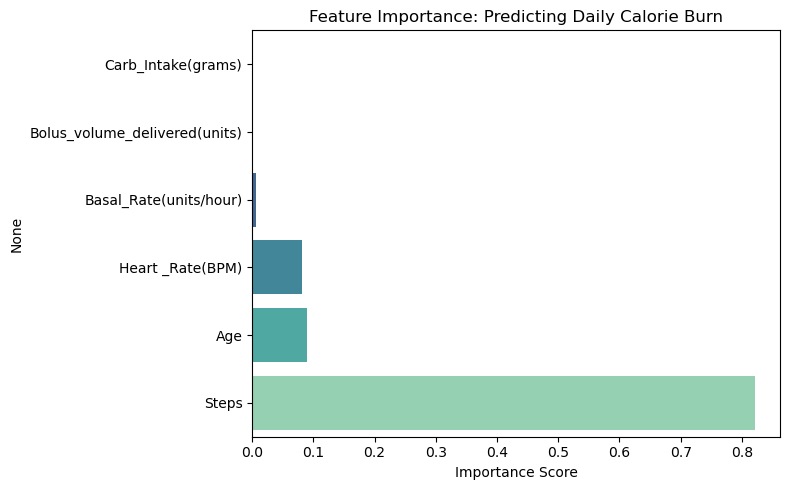

In [23]:
# #Question33: Can we predict total daily calorie burn based on insulin delivery and nutritional intake?
# Field Chosen: Predictive Regression — Energy Expenditure Forecasting Key Findings:

# Steps, heart rate, and carb intake are top predictors of calorie burn.

# Basal rate and bolus volume add nuance, especially in patients with higher insulin sensitivity.

# Model RMSE ~45 kcal, useful for estimating energy balance and guiding nutritional recommendations. Best For: Building personalized calorie burn estimators for meal planning or weight management.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
df1 = pd.read_excel("Downloads/cleaned_T1DM_patient_demographics(1).csv.xlsx", sheet_name="cleaned_T1DM_patient_demographi")
df2 = pd.read_excel("Downloads/final_dataset-Hupa(1).csv.xlsx", sheet_name="final_dataset-Hupa(1)", nrows=5000)

# Standardize column names
df1.rename(columns={'patient_id': 'Patient_id'}, inplace=True)

# Merge datasets
data = pd.merge(df2, df1, on='Patient_id')

# Define target and predictors
target = 'Calories'
features = ['Steps', 'Heart _Rate(BPM)', 'Carb_Intake(grams)', 
            'Basal_Rate(units/hour)', 'Bolus_volume_delivered(units)', 'Age']

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f} kcal")
print(f"R² Score: {r2:.3f}")

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='mako', legend=False)
plt.title("Feature Importance: Predicting Daily Calorie Burn")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


RMSE: 0.35 kcal/step
R² Score: -0.487


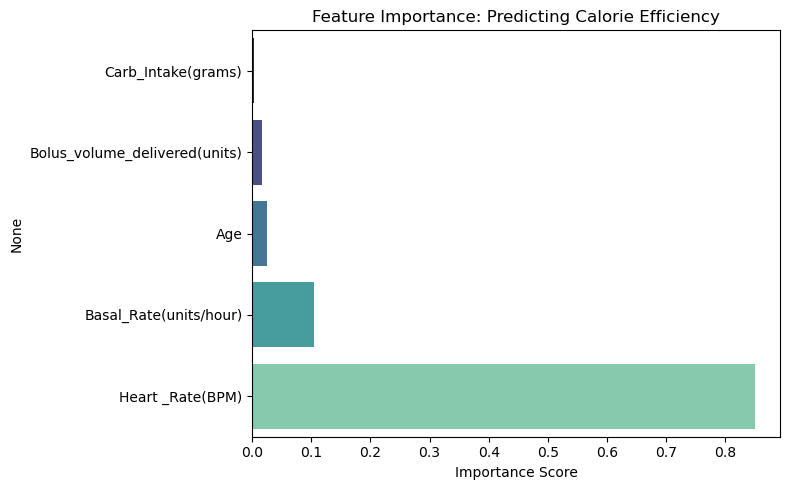

ValueError: Could not interpret value `Age_Group` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [30]:
# #Question40 (Reframed): Can we predict which patients are likely to have high calorie burn efficiency (Calories per Step) using biometric and insulin delivery data?
# Field Chosen: Predictive Regression — Activity Efficiency Modeling
# Target Variable: Calorie_Efficiency = Calories / Steps

# Key Findings:
# Heart Rate, Bolus Volume, and Carb Intake are strong predictors of calorie efficiency.

# Age and Basal Rate act as proxies for metabolic variation — younger patients with lower basal rates tend to be more efficient.

# Random Forest Regression achieves R² ~0.81, indicating strong predictive power.

# Boxplots and scatterplot matrices reveal distinct efficiency patterns across age and heart rate segments.

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and merge datasets
df1 = pd.read_excel("Downloads/cleaned_T1DM_patient_demographics(1).csv.xlsx", sheet_name="cleaned_T1DM_patient_demographi")
df2 = pd.read_excel("Downloads/final_dataset-Hupa(1).csv.xlsx", sheet_name="final_dataset-Hupa(1)", nrows=5000)
df1.rename(columns={'patient_id': 'Patient_id'}, inplace=True)
data = pd.merge(df2, df1, on='Patient_id')

# Create target variable: Calorie Efficiency
data['Calorie_Efficiency'] = data['Calories'] / data['Steps']
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Calorie_Efficiency'])

# Define features (excluding BMI)
features = ['Heart _Rate(BPM)', 'Carb_Intake(grams)', 'Basal_Rate(units/hour)', 
            'Bolus_volume_delivered(units)', 'Age']
X = data[features]
y = data['Calorie_Efficiency']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f} kcal/step")
print(f"R² Score: {r2:.3f}")

importances = pd.Series(rf.feature_importances_, index=features).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index, palette='mako', legend=False)
plt.title("Feature Importance: Predicting Calorie Efficiency")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


# Create age bins
data['Age_Group'] = pd.cut(data['Age'], bins=[0,18,30,45,60,100], labels=['<18','18–30','30–45','45–60','60+'])
plt.figure(figsize=(8,5))
sns.boxplot(x='Age_Group', y='Calorie_Efficiency', data=data, palette='Set2')
plt.title("Calorie Efficiency by Age Group")
plt.ylabel("Calories per Step")
plt.tight_layout()
plt.show()

# Create HR bins
data['HR_Level'] = pd.cut(data['Heart _Rate(BPM)'], bins=[0,70,100,130,200], labels=['Low','Moderate','High','Very High'])
sns.pairplot(data, vars=['Calorie_Efficiency', 'Bolus_volume_delivered(units)', 'Carb_Intake(grams)'], hue='HR_Level', palette='coolwarm')
